# K-Nearest Neighbor
#### Rick Gosalvez, Data Mining 2021

<i>Normalize data before clustering!</i>

# Theory (by Hand)

## 1. Hierarchical Methods - Complete Linkage Method (Max Distance)
max(d(Ai, Bj))

### Agglomerative Clustering Cacluations and Dendrogram

![Clustering and Dendrogram Calculations](img/HW7_T1.jpeg)

![Clustering and Dendrogram Calculations](img/HW7_T1_logic.jpeg)

k clusters for 4 iterations are:
* Iteration 1: 5 Clusters = ('A', 'B', 'C', 'D', 'E')
* Iteration 2: 4 Clusters = ('A,D', 'B', 'C', 'E')
* Iteration 3: 3 Clusters = ('A,D', 'B,E', 'C')
* Iteration 4: 2 Clusters = ('A,D,C', 'B,E')

## 2. K-means Clustering (w Euclidean dist.) 

![Kmeans Clustering Calculations](img/HW7_T2.jpeg)

![Kmeans Clustering Calculations](img/HW7_T2_logic.jpeg)

After 1 iteration, cluster means do not change; there is no change in clusters.
* Cluster 1 = (A,C,D)
* Cluster 2 = (B, E)

# Practice

## 1. K-means Clustering and Elbow Chart

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 1.1 Load and Prep Data

In [2]:
df = pd.read_csv('Utilities.csv')
print(df.shape)
df.head()

(22, 9)


,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


#### 1.2 Remove Company (make index label)

In [3]:
labels = np.array(df['Company'])
labels

array(['Arizona ', 'Boston ', 'Central ', 'Commonwealth', 'NY',
       'Florida ', 'Hawaiian ', 'Idaho', 'Kentucky', 'Madison ', 'Nevada',
       'New England', 'Northern', 'Oklahoma', 'Pacific ', 'Puget',
       'San Diego', 'Southern', 'Texas', 'Wisconsin', 'United',
       'Virginia'], dtype=object)

In [4]:
df = df.drop('Company', axis=1)
df.index = labels
df.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


<div class="alert alert-block alert-warning">
<b>IMPORTANT TO NORMALIZE</b> data before conducting ML clustering to improve processing & accuracy! <br>Use sklearn StandardScalar for this example, but others exist (e.g. MinMaxScalar, Z-Score, etc.)</div>

In [5]:
norm = StandardScaler()
df_norm = norm.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns=df.columns)
df_norm.index = labels
df_norm.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470


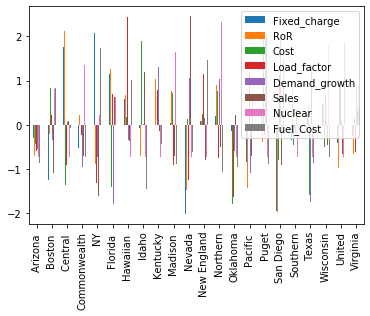

In [6]:
df_norm.plot(kind = 'bar')

#### 1.3 KMeans

In [7]:
km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=1)
y_km = km.fit_predict(df_norm)

In [8]:
y_km

array([2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2],
      dtype=int32)

In [9]:
df_norm['Clusters'] = y_km
sorted_df = df_norm.sort_values(by='Clusters')
sorted_df.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,Clusters
Nevada,-2.019709,-1.476137,0.119723,-1.256665,1.069762,2.458495,-0.731447,-0.616086,0
Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904,0
Puget,0.254670,-0.381474,2.082734,-0.224218,1.956008,2.040430,-0.731447,-0.888489,0
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436,1
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470,1


#### 1.3 Elbow Chart

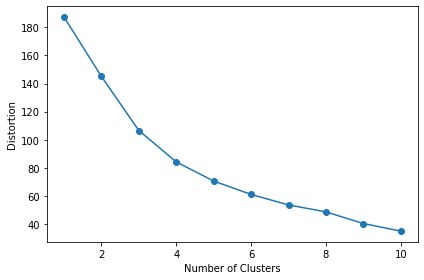

In [10]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=0)
    km.fit(df_norm)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

#### 1.4 Three Cluster Groupings

In [11]:
Cluster1 = sorted_df.loc[df_norm['Clusters'] == 0].index
Cluster1 = Cluster1.tolist()

Cluster2 = sorted_df.loc[df_norm['Clusters'] == 1].index
Cluster2 = Cluster2.tolist()

Cluster3 = sorted_df.loc[df_norm['Clusters'] == 2].index
Cluster3 = Cluster3.tolist()

print(f'Cluster 1 has {len(Cluster1)} Companies:\n {Cluster1}\n')
print(f'Cluster 2 has {len(Cluster2)} Companies:\n {Cluster2}\n')
print(f'Cluster 3 has {len(Cluster3)} Companies:\n {Cluster3}')
print()

Cluster 1 has 3 Companies:
 ['Nevada', 'Idaho', 'Puget']

Cluster 2 has 7 Companies:
 ['Boston ', 'NY', 'Hawaiian ', 'San Diego', 'United', 'New England', 'Pacific ']

Cluster 3 has 12 Companies:
 ['Wisconsin', 'Texas', 'Southern', 'Arizona ', 'Northern', 'Madison ', 'Kentucky', 'Florida ', 'Commonwealth', 'Central ', 'Oklahoma', 'Virginia']



<table>
    <tr>
        <th>Cluster</th>
        <th>Companies</th>
    </tr>
    <tr>
        <td>1</td>
        <td>Nevada, Idaho, Puget</td>
    </tr>
        <tr>
        <td>2</td>
        <td>Boston, NY, Hawaiian, San Diego, United, New England, Pacific</td>
    </tr>
        <tr>
        <td>3</td>
        <td>Wisconsin, Texas, Southern, Arizona, Northern, Madison, Kentucky, Florida, Commonwealth, Central, Oklahoma, Virginia</td>
    </tr>
</table>

## 2. Agglomerative Clustering and Dendrogram

In [16]:
from scipy.cluster.hierarchy import linkage          # scipy hierarchical/agglomerative clustering.
from sklearn.cluster import AgglomerativeClustering  # << not used >>, but possible; scipy is easier package to use!

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas.util.testing as tm

#### 2.1 and 2.2 - use prior df_norm (prepared) dataframe

#### 2.3 Agglomerative Clustering

In [13]:
ac = linkage(df_norm, method='average', metric='euclidean')

#### 2.3 Dendrogram

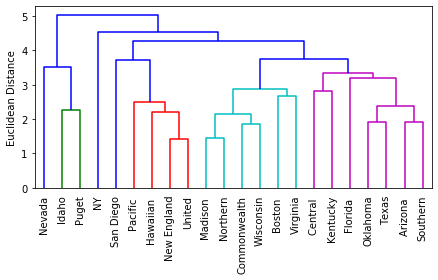

In [14]:
from scipy.cluster.hierarchy import dendrogram

dendr = dendrogram(
    ac,
    leaf_rotation=90, 
    labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

#### Truncate to 3 Clusters Based on Euclidean Distance

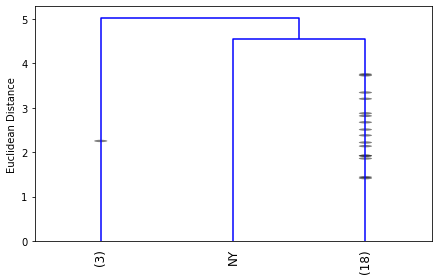

In [15]:
dendr = dendrogram(
    ac,
    truncate_mode='lastp', # truncate to clusters
    p=3,                   # truncate to 3 clusters
    leaf_rotation=90, 
    show_contracted=True,  # show truncated clusters
    labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

#### 2.4 Three Cluster Groupings

<table>
    <tr>
        <th>Cluster</th>
        <th>Companies</th>
    </tr>
    <tr>
        <td>1</td>
        <td>Nevada, Idaho, Puget</td>
    </tr>
        <tr>
        <td>2</td>
        <td>NY</td>
    </tr>
        <tr>
        <td>3</td>
        <td>Hawaiian, Commonwealth, Madison, United, New England, Northern, Pacific, San Diego, Boston, Wisconsin, Arizona, Southern, Oklahoma, Kentucky, Florida, Virginia, Central, Texas</td>
    </tr>
</table>